<a href="https://colab.research.google.com/github/prog815/lernDLpython/blob/master/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D1%81%D0%BE%D0%B1%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример распознавания собственного изображения

Енин А.В.

Оренбург

16.08.2019

[VK](https://vk.com/alekseyenin)
[OK](http://ok.ru/profile/404477133)
[Twitter](https://twitter.com/EninAleksey)
[FB](https://www.facebook.com/alex.prog.1)
[Telegramm](https://t.me/AleseyEnin)
[Habr](https://habr.com/ru/users/eavprog/posts/)
[VC](https://vc.ru/u/262921-aleksey-enin)
[GitHub](https://github.com/prog815/lernPython)

делаем по образцу

https://colab.research.google.com/drive/1K3Pn8aXM06hUfhn241y8UIGQ_xcHKF8n#scrollTo=kXEiWgghL2-a

In [0]:
import tensorflow as tf
from IPython.display import Image
import numpy as np

In [0]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

# Готовим модель

## скачиваем готовую модель из репозитория

используем модель полученную в на в предыдущем эксперименте ["Анализ качества работы нейронной сети для распознавания моделей одежды в Keras"](https://colab.research.google.com/drive/1ZqhdgNRLaz1s3i8Mjy1wiT_1QOq3ub8h)

модель доступна в репозитории [GitHub](https://github.com/prog815/lernPython) [fash_mod.h5](https://github.com/prog815/lernPython/blob/master/fash_mod.h5)

In [9]:
!wget https://github.com/prog815/lernPython/raw/master/fash_mod.h5 -O fash_mod.h5

--2019-08-16 17:58:30--  https://github.com/prog815/lernPython/raw/master/fash_mod.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/prog815/lernPython/master/fash_mod.h5 [following]
--2019-08-16 17:58:31--  https://raw.githubusercontent.com/prog815/lernPython/master/fash_mod.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4911328 (4.7M) [application/octet-stream]
Saving to: ‘fash_mod.h5’

fash_mod.h5         100%[===================>]   4.68M  --.-KB/s    in 0.08s   

2019-08-16 17:58:31 (60.5 MB/s) - ‘fash_mod.h5’ saved [4911328/4911328]



## загружаем

In [10]:
model = tf.keras.models.load_model('fash_mod.h5')

W0816 17:58:43.678310 140711448176512 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0816 17:58:43.680250 140711448176512 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0816 17:58:43.690519 140711448176512 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# загружаем изображения

In [18]:
!wget https://minemshop.ru/images/1016013700.jpg -O платье.jpg
!wget http://www2.pick-goods.ru/img/products/24292-rubashki-oodji.jpg -O рубашка.jpg

--2019-08-16 18:13:51--  https://minemshop.ru/images/1016013700.jpg
Resolving minemshop.ru (minemshop.ru)... 81.177.174.9
Connecting to minemshop.ru (minemshop.ru)|81.177.174.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155069 (151K) [image/jpeg]
Saving to: ‘платье.jpg’

платье.jpg          100%[===================>] 151.43K   212KB/s    in 0.7s    

2019-08-16 18:13:52 (212 KB/s) - ‘платье.jpg’ saved [155069/155069]

--2019-08-16 18:13:53--  http://www2.pick-goods.ru/img/products/24292-rubashki-oodji.jpg
Resolving www2.pick-goods.ru (www2.pick-goods.ru)... 104.24.123.246, 104.24.122.246, 2606:4700:30::6818:7af6, ...
Connecting to www2.pick-goods.ru (www2.pick-goods.ru)|104.24.123.246|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘рубашка.jpg’

рубашка.jpg             [  <=>               ] 275.83K   602KB/s    in 0.5s    

2019-08-16 18:13:55 (602 KB/s) - ‘рубашка.jpg’ saved [282445]



## определяем функцию для распознавания

In [0]:
def myPredict(fn):
  img = tf.keras.preprocessing.image.load_img(fn,color_mode="grayscale",target_size=(28,28))
  img_ar = tf.keras.preprocessing.image.img_to_array(img)
  img_ar = img_ar.reshape(1,28,28)
  img_ar = 255 - img_ar
  img_ar /= 255
  return classes[np.argmax( model.predict(img_ar))]

## распознаем

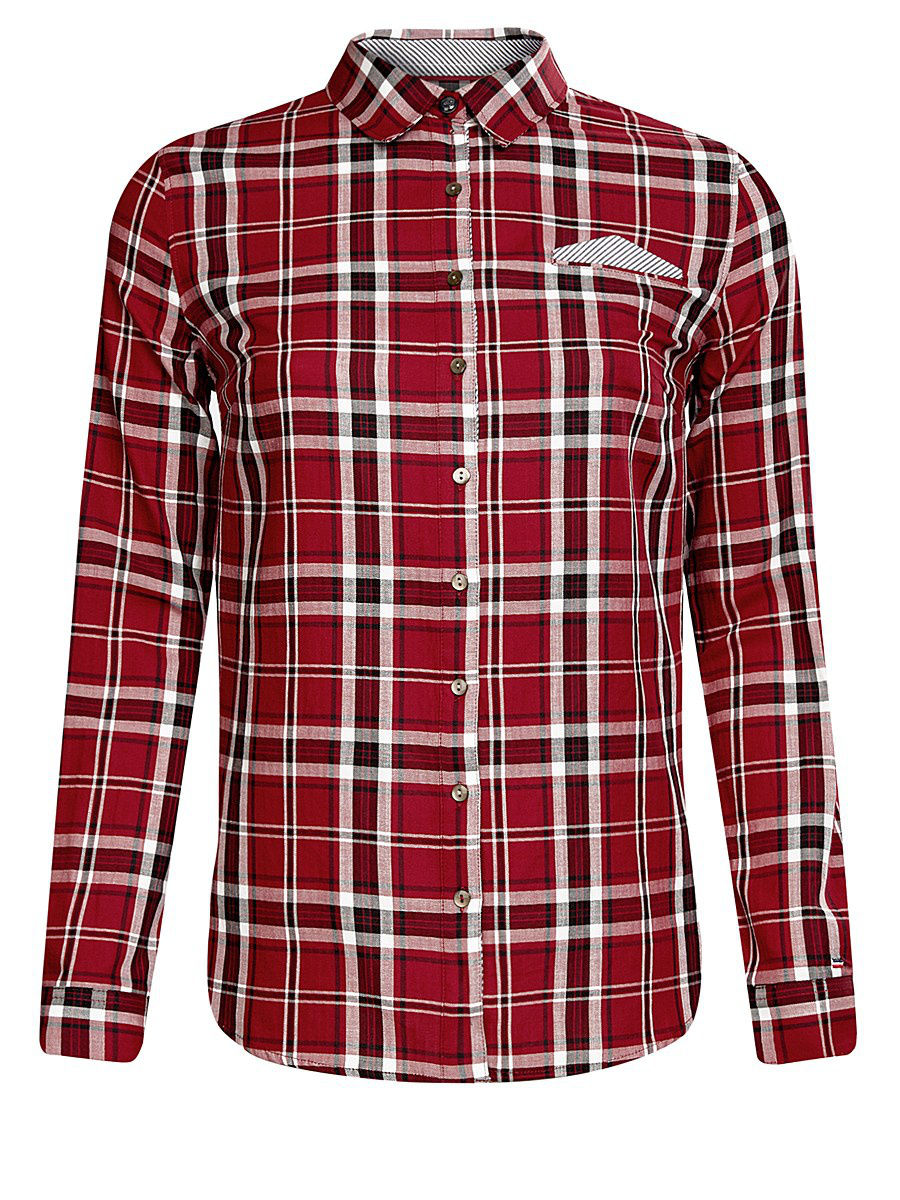

In [42]:
Image("рубашка.jpg",width=150,height=150)

In [41]:
myPredict("рубашка.jpg")

'свитер'

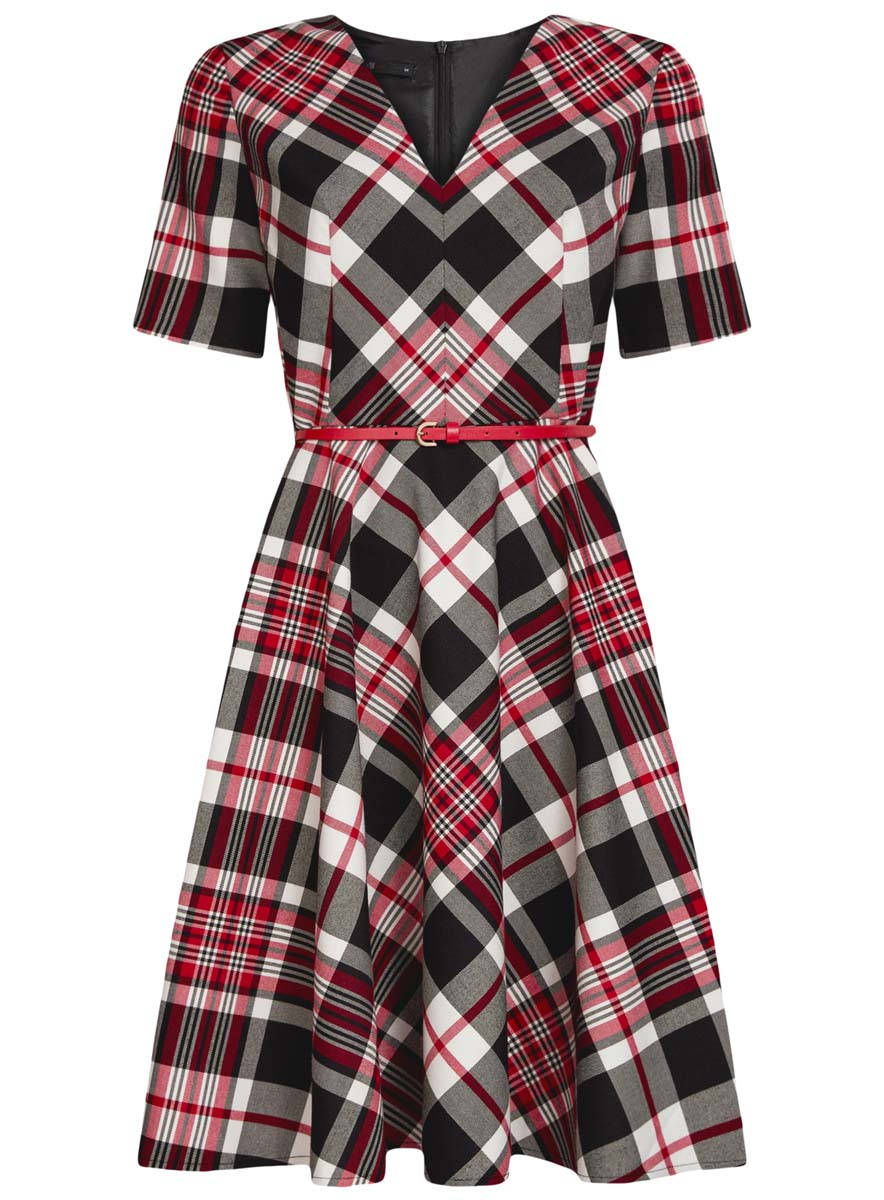

In [43]:
Image("платье.jpg",width=150,height=150)

In [44]:
myPredict("платье.jpg")

'платье'